## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0721 17:27:03.894352 4664387008 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 17:27:03.943516 4664387008 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 17:27:03.965070 4664387008 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 17:27:04.069591 4664387008 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 17:27:04.084561 46

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0721 17:27:05.743340 4664387008 deprecation.py:323] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 17:27:05.810642 4664387008 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.9288 - acc: 0.3030 - val_loss: 1.7899 - val_acc: 0.3593
Epoch 2/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.7068 - acc: 0.3916 - val_loss: 1.7040 - val_acc: 0.3973
Epoch 3/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.6115 - acc: 0.4237 - val_loss: 1.5913 - val_acc: 0.4442
Epoch 4/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.5542 - acc: 0.4452 - val_loss: 1.5601 - val_acc: 0.4466
Epoch 5/100
50000/50000 [==============================] - 7s 139us/step - loss: 1.5016 - acc: 0.4652 - val_loss: 1.4740 - val_acc: 0.4792
Epoch 6/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.4655 - acc: 0.4778 - val_loss: 1.5022 - val_acc: 0.4639
Epoch 7/100
50000/50000 [==============================] - 8s 156us/step - loss: 1.4270 - acc: 0.4901 - val_loss: 1.

50000/50000 [==============================] - 7s 141us/step - loss: 0.5226 - acc: 0.8140 - val_loss: 2.0129 - val_acc: 0.5180
Epoch 60/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.5239 - acc: 0.8111 - val_loss: 2.0261 - val_acc: 0.5171
Epoch 61/100
50000/50000 [==============================] - 7s 146us/step - loss: 0.5040 - acc: 0.8173 - val_loss: 2.0665 - val_acc: 0.5157
Epoch 62/100
50000/50000 [==============================] - 7s 150us/step - loss: 0.4980 - acc: 0.8224 - val_loss: 2.0850 - val_acc: 0.5169
Epoch 63/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.4938 - acc: 0.8212 - val_loss: 2.1486 - val_acc: 0.5094
Epoch 64/100
50000/50000 [==============================] - 7s 131us/step - loss: 0.4838 - acc: 0.8272 - val_loss: 2.1648 - val_acc: 0.5095
Epoch 65/100
50000/50000 [==============================] - 7s 130us/step - loss: 0.4913 - acc: 0.8239 - val_loss: 2.1760 - val_acc: 0.5161
Epoch 66/100
50000/50000 [=======

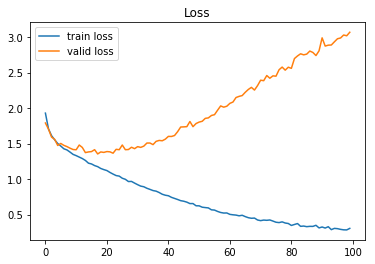

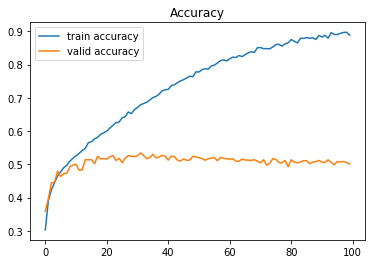

In [9]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢